<a href="https://www.kaggle.com/code/sitrakamatthew/best-selling-gaming-consoles-analysis?scriptVersionId=126140568" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/best-selling-game-consoles-of-all-time/best-selling game consoles.csv


This dataset contains information about the best-selling game consoles of all time. The data includes the console name, manufacturer, release year, total units sold, and some other information. The dataset covers a wide range of consoles, from the earliest releases to the current generation of consoles.

![Consoles](https://cherry.img.pmdstatic.net/fit/https.3A.2F.2Fimg.2Egaming.2Egentside.2Ecom.2Fs3.2Ffrgsg.2Fjeux-video.2Fdefault_2020-01-07_9b69fa6e-419c-4c28-ae13-6bd7174a371c.2Ejpeg/1200x675/quality/80/le-top-15-des-meilleures-consoles-de-tous-les-temps.jpg)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

from IPython.core.display import HTML
%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.max_rows', None)

/kaggle/input/best-selling-game-consoles-of-all-time/best-selling game consoles.csv


In [3]:
df = pd.read_csv("/kaggle/input/best-selling-game-consoles-of-all-time/best-selling game consoles.csv")

In [4]:
# Check the first 5 rows of the dataset
print(df.head())

#We have a large panel ! 
#Also my fav one is the GAME BOY !!! Pokemon Emerald Version :3

      Console Name      Type   Company  Released Year  Discontinuation Year  \
0    PlayStation 2      Home      Sony           2000                  2013   
1      Nintendo DS  Handheld  Nintendo           2004                  2013   
2  Nintendo Switch    Hybrid  Nintendo           2017                     0   
3         Game Boy  Handheld  Nintendo           1989                  2003   
4   Game Boy Color  Handheld  Nintendo           1998                  2003   

   Units sold (million)                                            Remarks  
0                155.00           Final sales are greater than 155 million  
1                154.02                                                NaN  
2                122.55                                                NaN  
3                 64.42  The Game Boy (1989) and the Game Boy Color (19...  
4                 44.06                                                NaN  


In [5]:
# Check for missing values just in case 
print(df.isnull().sum())

Console Name             0
Type                     0
Company                  0
Released Year            0
Discontinuation Year     0
Units sold (million)     0
Remarks                 35
dtype: int64


In [6]:
# Drop the 'Remarks' column as it contains a lot of missing values
df = df.drop('Remarks', axis=1)

In [7]:
# Check the statistics of the numerical columns
print(df.describe())

       Released Year  Discontinuation Year  Units sold (million)
count      51.000000             51.000000             51.000000
mean     1996.058824           1844.803922             35.549412
std        12.378064            543.657319             42.608844
min      1976.000000              0.000000              1.000000
25%      1987.500000           1992.000000              3.200000
50%      1994.000000           1998.000000             13.560000
75%      2004.500000           2011.500000             60.205000
max      2020.000000           2020.000000            155.000000


# What can we say about that DESCRIBE ? 

Most of the time people put the describe without any comment. 
HOWEVER ! We can clearly that : 
* The dataset contains information on 51 gaming consoles.
* The earliest console in the dataset was released in **1976** and the latest in 2020, thus no PS7 yet. 
* On average, consoles were discontinued around 1845, which is a strange value since some consoles may still be available for purchase today. This may be due to some missing or erroneous data in the Discontinuation Year column.

* The average number of units sold by a console is *35.55 million*, with a standard deviation of 42.61 million. This indicates a wide variation in popularity between different consoles. (aka Dam... some consoles are TOP tiers S, and others s...heu.. didn't sold well.

* The minimum number of units sold is 1 million, while the maximum number is 155 million.
* 50% of the consoles sold less than 13.56 million units, while 25% of the consoles sold less than 3.2 million units. This indicates that there are a few consoles that sold a lot more units than the rest.

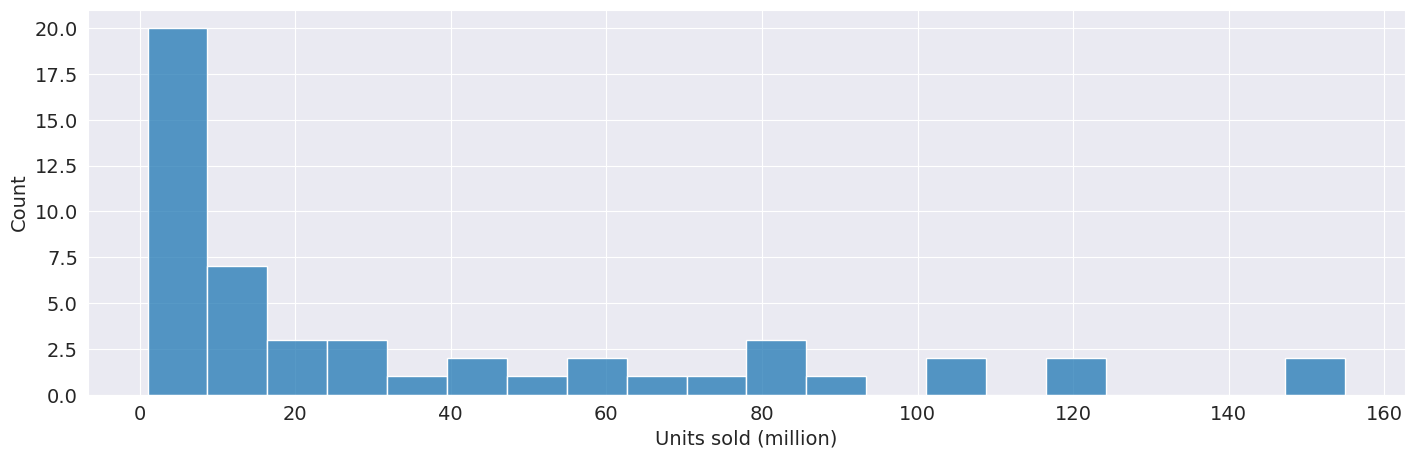

In [8]:
# Visualize the distribution of the 'Units Sold (million)' column
sns.histplot(data=df, x='Units sold (million)', bins=20)
plt.show()

#Why ? So we can easily (and really fastly) see the distribution. Many consols sold less than 1 million of units.

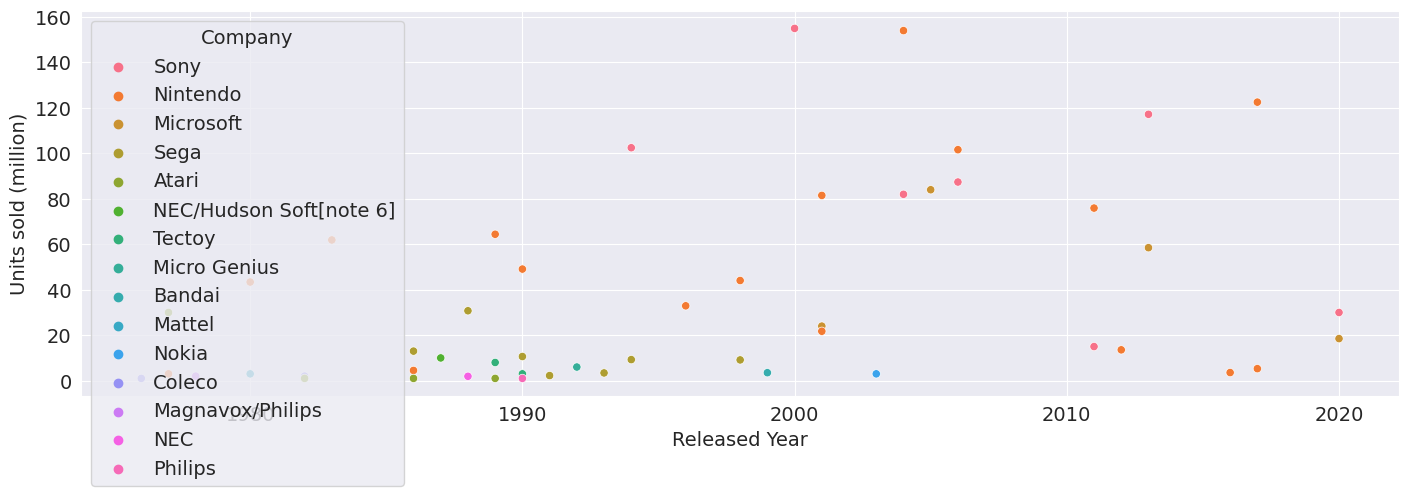

In [9]:
# Visualize the relationship between 'Released Year' and 'Units Sold (million)'
sns.scatterplot(data=df, x='Released Year', y='Units sold (million)', hue='Company')
plt.show()

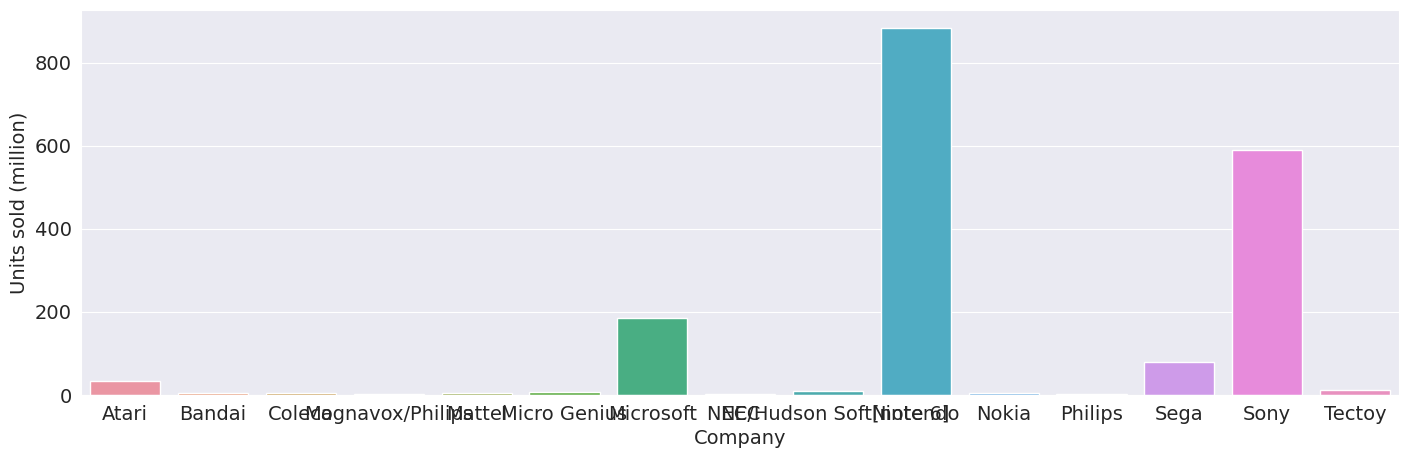

In [10]:
# Now we can group the data by 'Company' and calculate the total units sold for each company
total_units_sold = df.groupby('Company')['Units sold (million)'].sum().reset_index()
sns.barplot(data=total_units_sold, x='Company', y='Units sold (million)')
plt.show()

# TOP 5 Sellers ?!! 
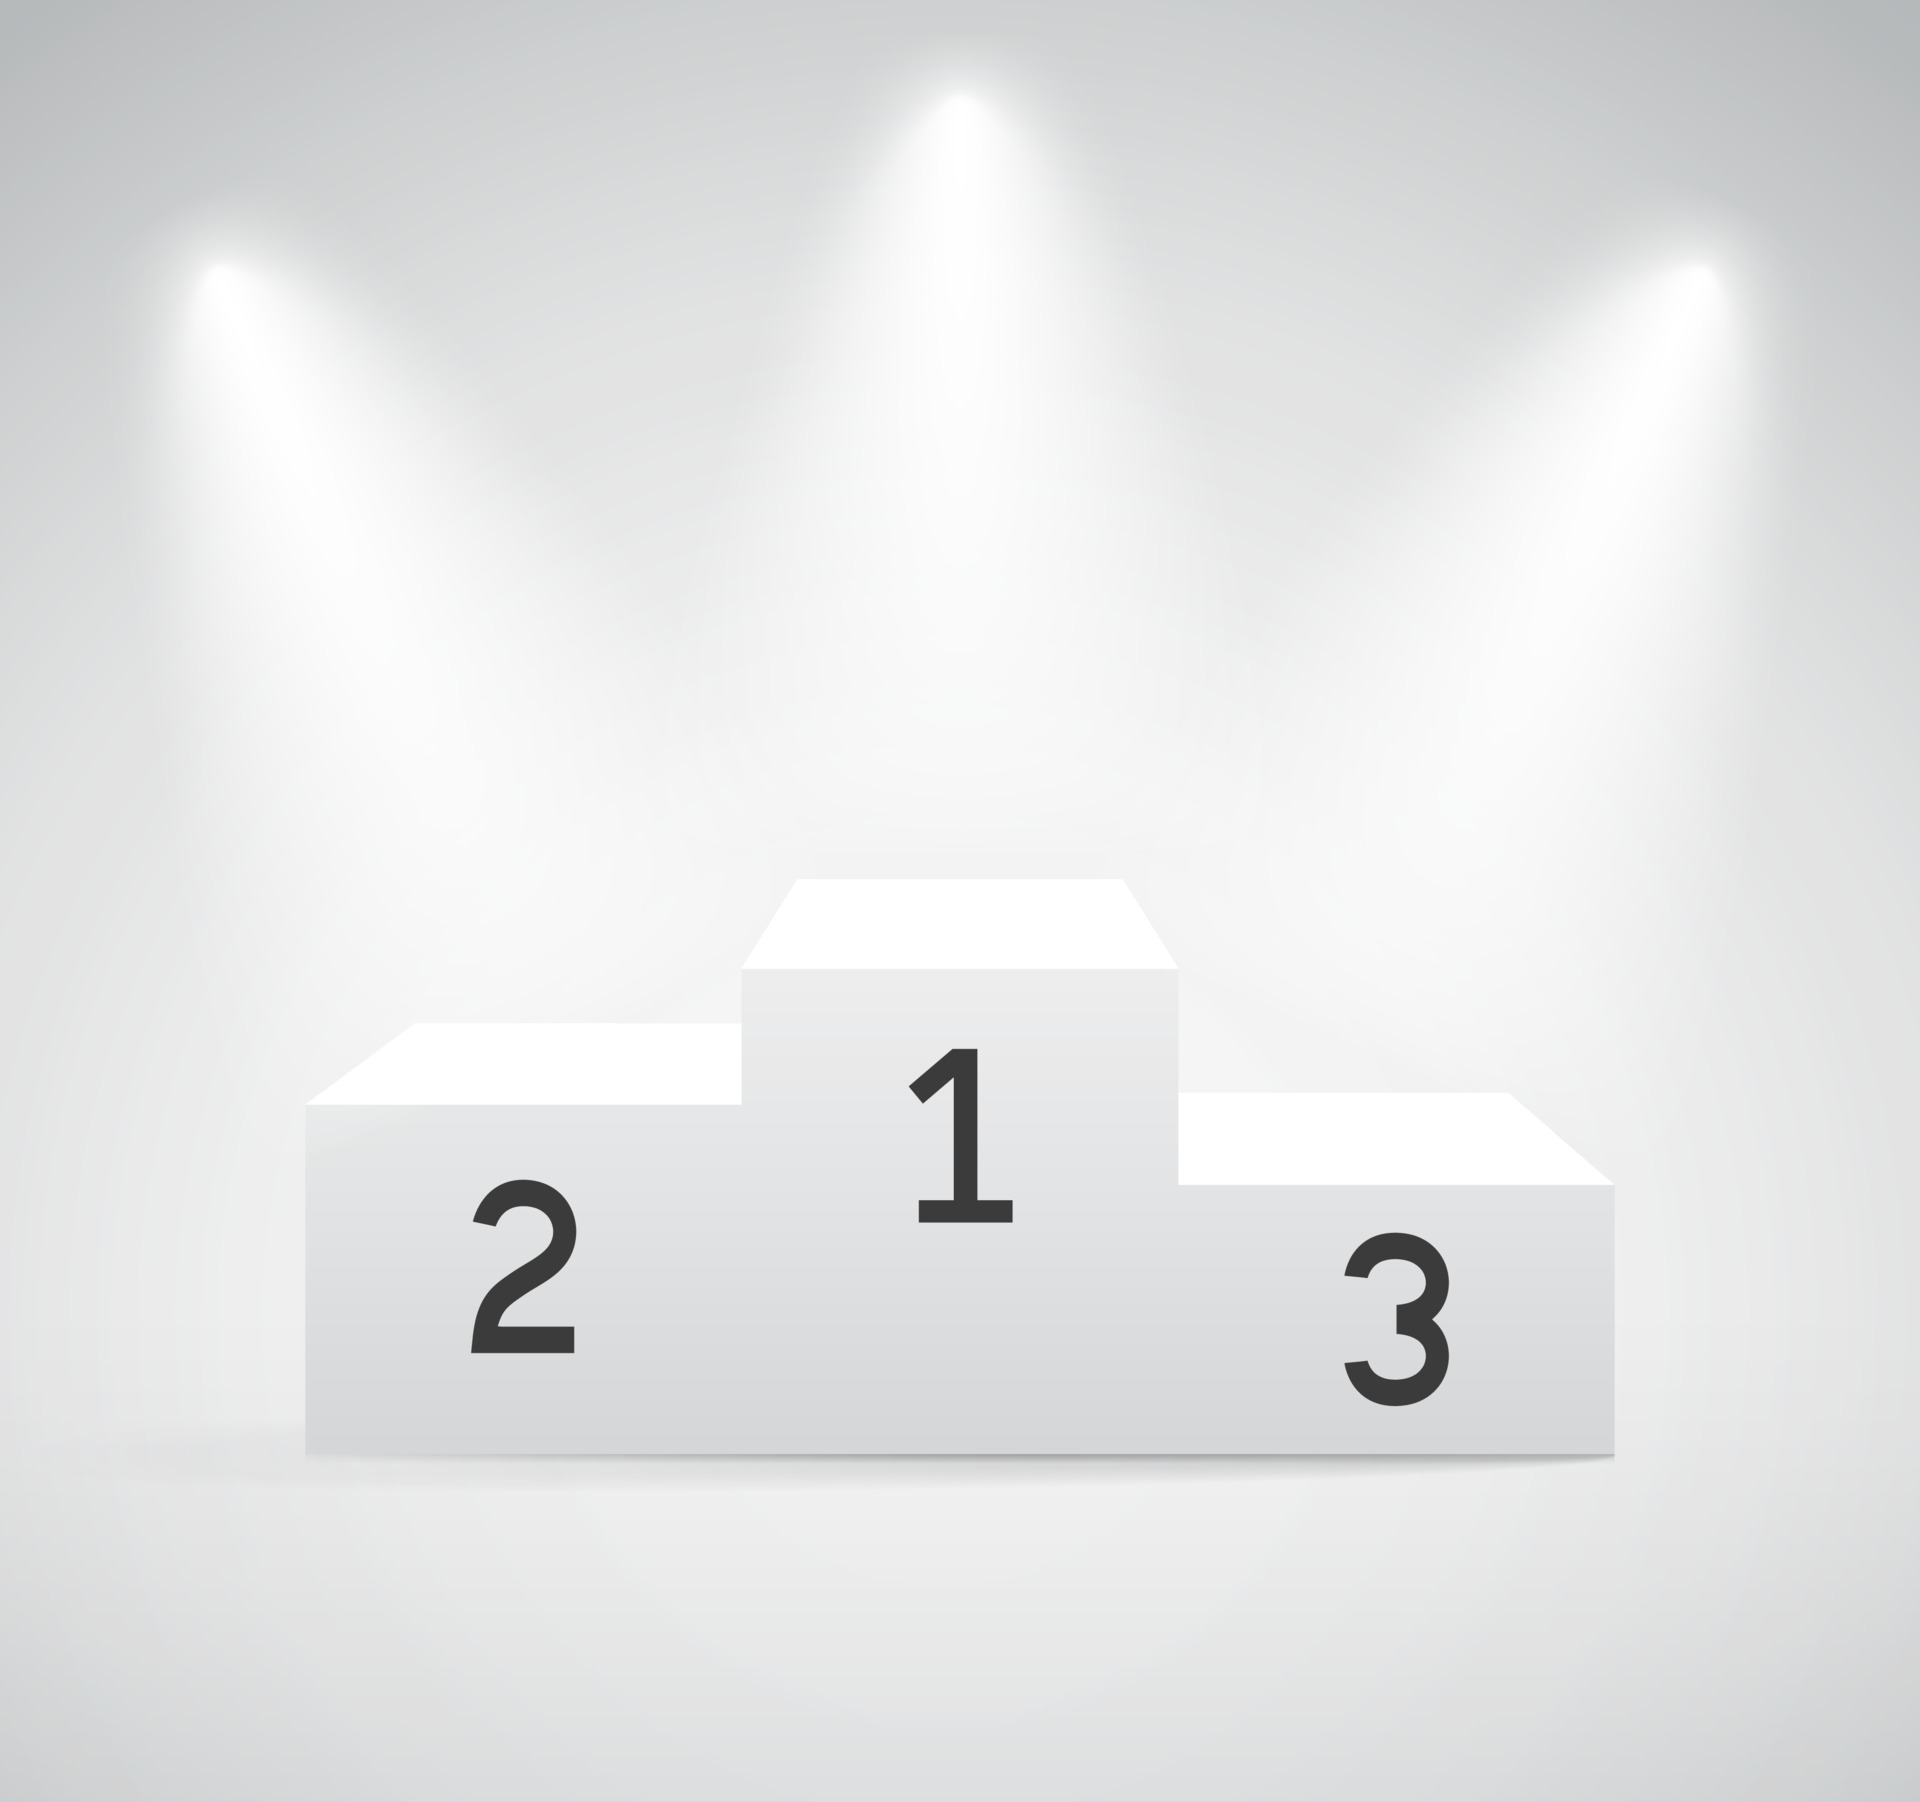

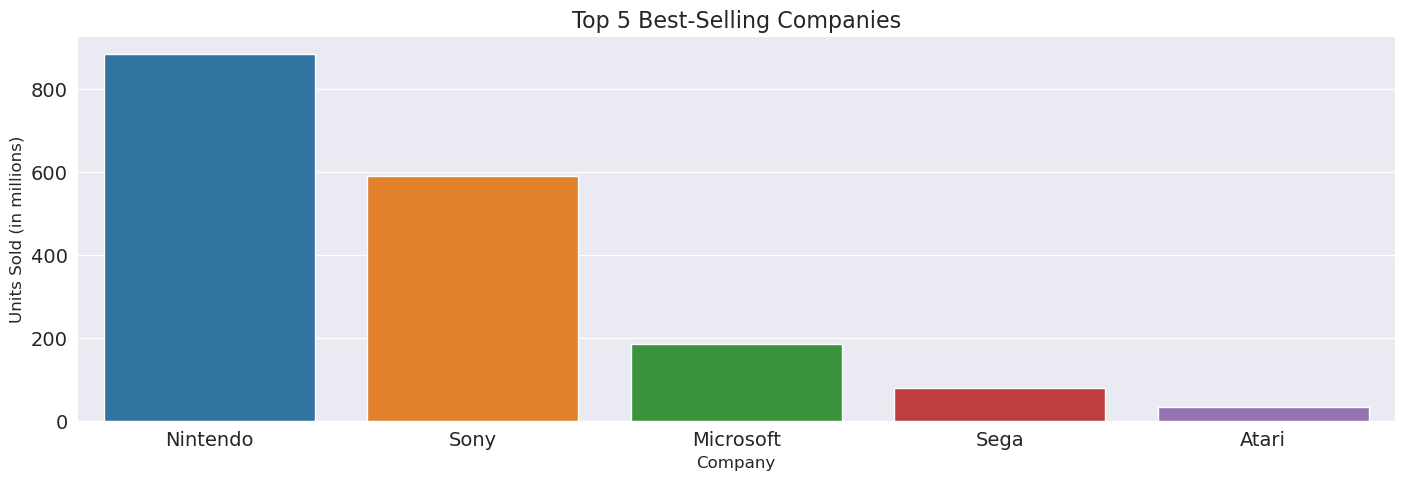

In [11]:
# Group the data by 'Company' and calculate the total units sold for each company
total_units_sold = df.groupby('Company')['Units sold (million)'].sum().reset_index()

# Sort the DataFrame by 'Units sold (million)' in descending order and select the top 5 rows
top_5_companies = total_units_sold.sort_values('Units sold (million)', ascending=False).head(5)

# Create a barplot of the top 5 companies
sns.barplot(data=top_5_companies, x='Company', y='Units sold (million)')
plt.title('Top 5 Best-Selling Companies', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Units Sold (in millions)', fontsize=12)
plt.show()


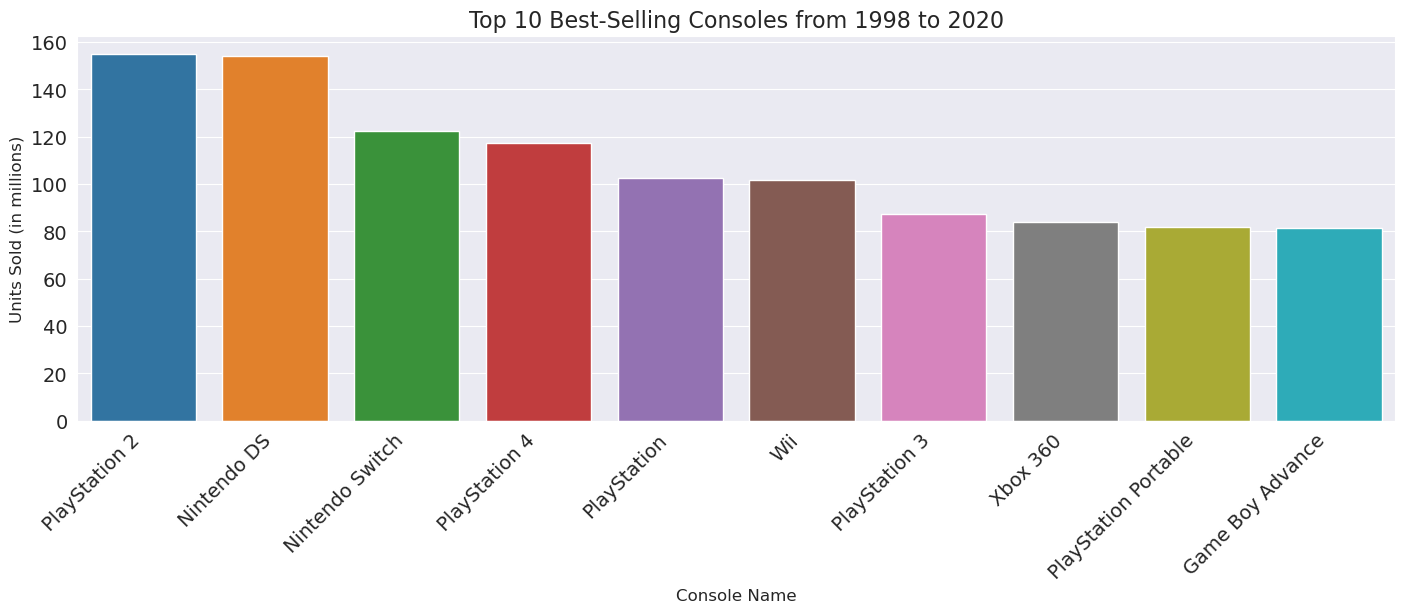

In [12]:
# Sort by Units sold in descending order and select the top 10 consoles.
top_10_consoles = df.sort_values('Units sold (million)', ascending=False).head(10)

# Create a barplot of the top 10 consoles
sns.barplot(data=top_10_consoles, x='Console Name', y='Units sold (million)')
plt.title('Top 10 Best-Selling Consoles from 1998 to 2020', fontsize=16)
plt.xlabel('Console Name', fontsize=12)
plt.ylabel('Units Sold (in millions)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


# Time Series

What are Time Series ? Your friend. 
It's the evolution of any variable over TIME. 

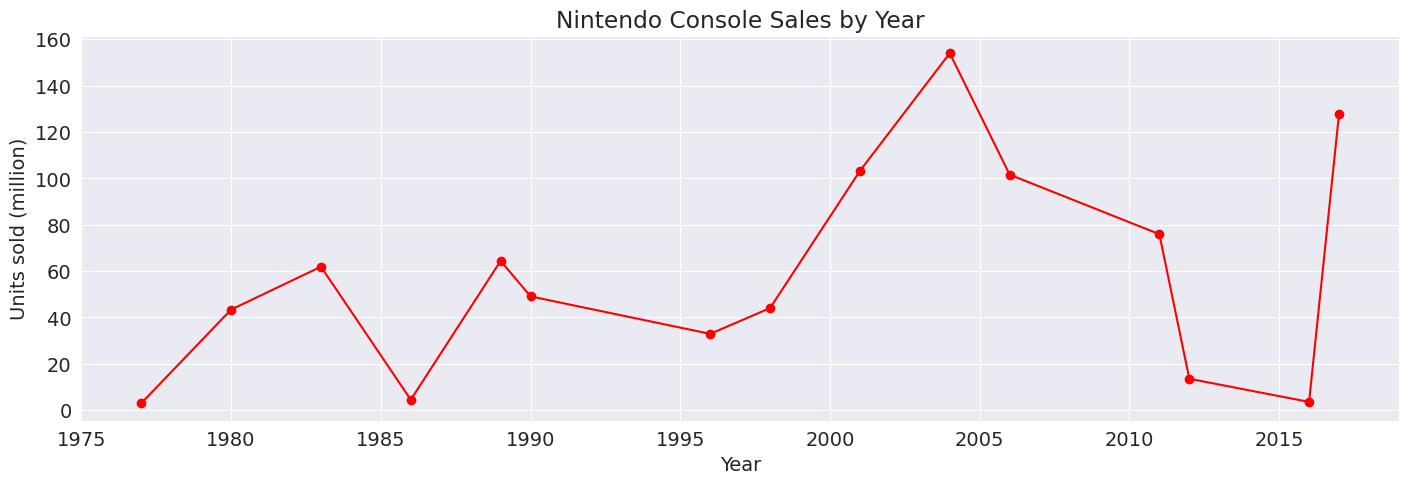

In [13]:
# Filter the dataframe to only include Nintendo consoles
nintendo_df = df[df['Company'] == 'Nintendo']

# Group by released year and calculate total units sold for each year
units_sold_by_year = nintendo_df.groupby('Released Year')['Units sold (million)'].sum()

# Create a line plot to show the trend over time
plt.plot(units_sold_by_year.index, units_sold_by_year.values, '-o', color ='red')
plt.xlabel('Year')
plt.ylabel('Units sold (million)')
plt.title('Nintendo Console Sales by Year')
plt.show()

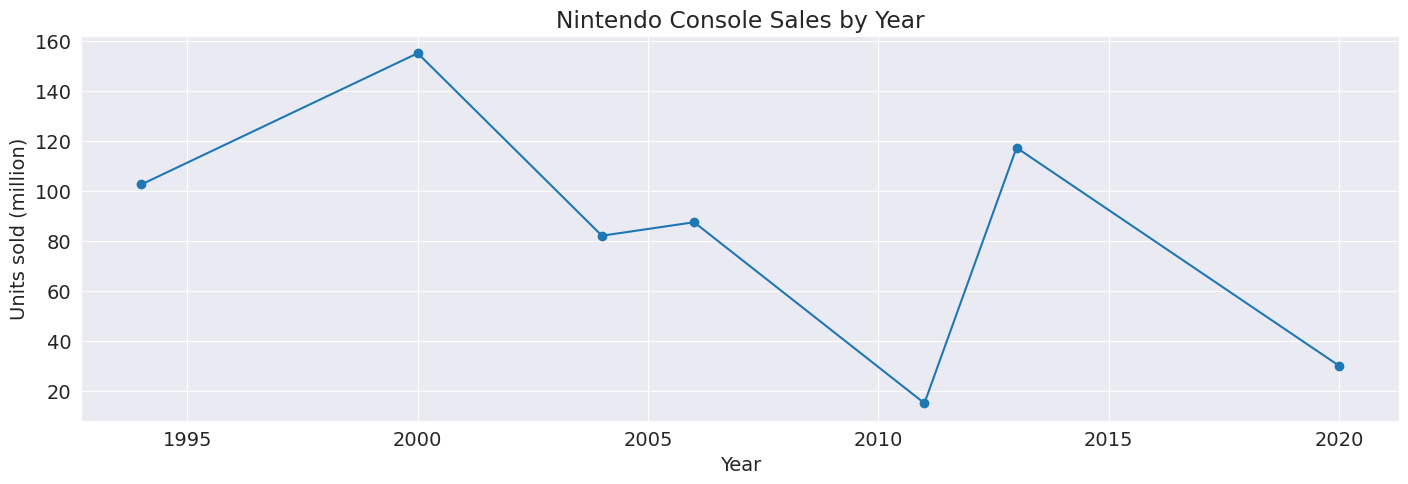

In [14]:
# Filter the dataframe to only include Nintendo consoles
nintendo_df = df[df['Company'] == 'Sony']

# Group by released year and calculate total units sold for each year
units_sold_by_year = nintendo_df.groupby('Released Year')['Units sold (million)'].sum()

# Create a line plot to show the trend over time
plt.plot(units_sold_by_year.index, units_sold_by_year.values, '-o')
plt.xlabel('Year')
plt.ylabel('Units sold (million)')
plt.title('Nintendo Console Sales by Year')
plt.show()

# Mario is better than Fifa ?! 

Let's see it on a bigger level. 

MONEY (captain Krabs gif)

More precisely : STOKCS !

In [15]:
!pip install yfinance
import yfinance as yf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 1.4 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


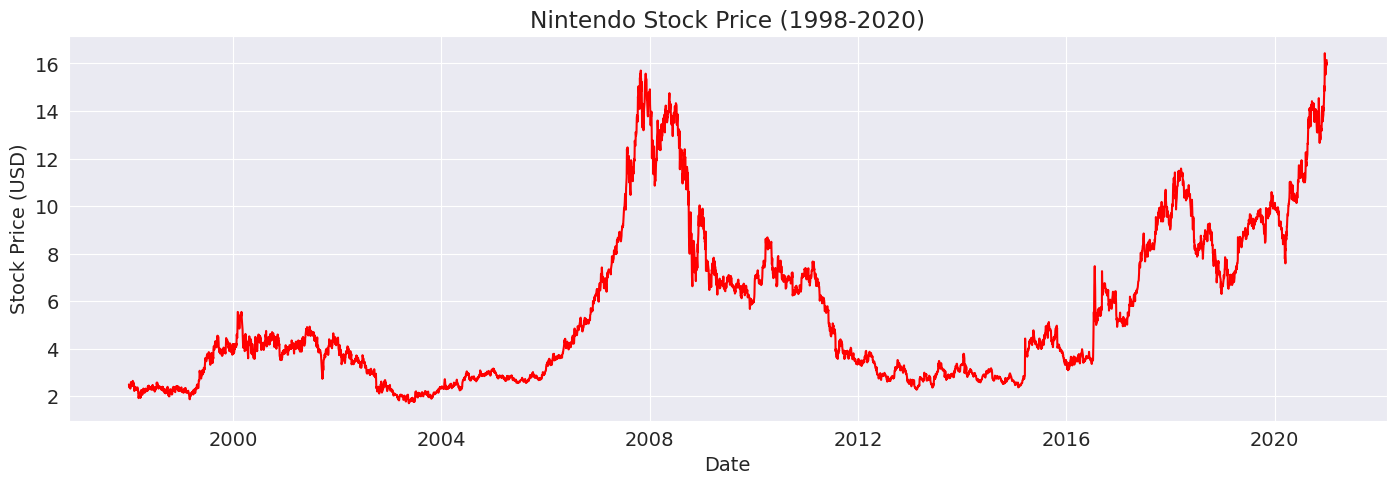

In [16]:
# Define the ticker symbol for Nintendo
ticker = "NTDOY"

# Load the historical stock price data for Nintendo from Yahoo Finance
df = yf.download(ticker, start="1998-01-01", end="2020-12-31")

# Create a line plot to show the trend over time
plt.plot(df.index, df['Close'], '-r')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Nintendo Stock Price (1998-2020)')
plt.show()


# Parallel can be made ! 

Thanks for reading it and feel free to add any code ! :D